# PART 1 - Machine Learning

### Task 1.1 - Data Preparation
There are 100 rows and 11 dimensions in the dataset. The data is 100% dense. Features were not labelled, hence labels were provided when imported.

Task is to predict the number of containers a ship can carry. 
The target is known hence this is supervised learning.

From the inputs we want to get a output of the weighted sum : 𝑦 = 𝑓(𝑥𝑤)

Import necessary modules and Read data + add feature names
Call the head method to get a general overview of the data

In [1]:
#Import required modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cols = ["IMO_NO.", "Vessel_Name", "Year_Built", "Gross_Tonnage", "Deadweight_Tonnage", "Length", "Beam", "Capacity_(TEU)", "Forward_Bays", "Center_Bays", "Aft_Bays"]
data = pd.read_csv('containers.csv',names=cols)
data.head()
data.loc[32]


IMO_NO.                  9619438
Vessel_Name           MSC ALBANY
Year_Built                  2013
Gross_Tonnage              94017
Deadweight_Tonnage        112516
Length                    299.18
Beam                      286.67
Capacity_(TEU)              8886
Forward_Bays                  14
Center_Bays                    0
Aft_Bays                       4
Name: 32, dtype: object

**Explore the data**

Our first step is to summarize the DataFrame by  computing aggregations. We can do this by using the info method in Pandas. We can see that all data is non-null as expected and we have 8 numeric values, one target, and one String.

In [2]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   IMO_NO.             100 non-null    int64  
 1   Vessel_Name         100 non-null    object 
 2   Year_Built          100 non-null    int64  
 3   Gross_Tonnage       100 non-null    int64  
 4   Deadweight_Tonnage  100 non-null    int64  
 5   Length              100 non-null    float64
 6   Beam                100 non-null    float64
 7   Capacity_(TEU)      100 non-null    int64  
 8   Forward_Bays        100 non-null    int64  
 9   Center_Bays         100 non-null    int64  
 10  Aft_Bays            100 non-null    int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 8.7+ KB


,IMO_NO.,Year_Built,Gross_Tonnage,Deadweight_Tonnage,Length,Beam,Capacity_(TEU),Forward_Bays,Center_Bays,Aft_Bays
count,1.000000e+02,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,9.457695e+06,2009.29000,103460.380000,107838.850000,313.804100,46.033200,9721.430000,10.980000,3.760000,3.790000
std,2.645332e+05,7.05003,60777.083352,57016.601909,71.138278,26.519082,6079.659143,3.074759,5.140687,1.640984
min,8.201648e+06,1982.00000,6191.000000,7979.000000,127.940000,19.200000,686.000000,6.000000,0.000000,0.000000
25%,9.310704e+06,2006.00000,55350.250000,67245.000000,278.455000,36.055000,5002.750000,8.000000,0.000000,4.000000
50%,9.446524e+06,2010.00000,94209.500000,104034.000000,332.675000,45.620000,8641.000000,11.000000,0.000000,4.000000
75%,9.687781e+06,2014.00000,149213.500000,150710.500000,366.155000,51.060000,13938.000000,14.000000,10.000000,5.000000
max,9.869186e+06,2021.00000,232311.000000,232606.000000,400.000000,286.670000,23964.000000,17.000000,14.000000,10.000000


**Finding outliers and inconsistent data** 

For each of these features, comparing the max and 75% values, we can start to see a huge difference in the Beam (Width) feature. This confirms that there may be an error with some of the tuples. 

In [3]:
print(data['IMO_NO.'].value_counts())

IMO_NO.
9314947    2
9260421    1
9298997    1
9454436    1
9631981    1
          ..
9619438    1
9618276    1
9444273    1
9236470    1
9795610    1
Name: count, Length: 99, dtype: int64


**Duplicate Vessel Identification Number (IMO)**

Now lets count the vessel identification number, which should be unique for the given dataset, however we can easily spot a duplicate IMO vessel. An online search shows that this vessel was renamed/purchased, we will leave in this duplicate vessel. IMO No. 9314947

Let us investigate further.

Let’s have a quick look at the distribution of the Beam feature by plotting the histograms.

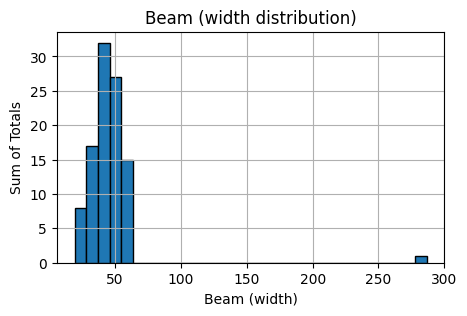

In [4]:

# for col in data.iloc[:,2:11]:
data['Beam'].hist(figsize=(5, 3), bins=30, edgecolor="black", )
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.title('Beam (width distribution)')
plt.xlabel('Beam (width)')
plt.ylabel("Sum of Totals")
plt.show()

**Fix the outlier, incorrect data**

Here we can see one ship has a length and width of 300x290 meters. I've never seen a almost square vessel before, probably doesn't go very fast!  The outlier is identified as MSC Albany with IMO 9619438. Correct beam should be 48meters. (https://www.vesselfinder.com/vessels/details/9619438) Since we have good reason to believe this is factually incorrect data it would be appropriate to correct the Beam to 48 meters

In [5]:
corrected_beam_MSC_Albany = 48
edited_data = data.copy()
edited_data.at[32,'Beam'] = corrected_beam_MSC_Albany
edited_data.loc[32]


IMO_NO.                  9619438
Vessel_Name           MSC ALBANY
Year_Built                  2013
Gross_Tonnage              94017
Deadweight_Tonnage        112516
Length                    299.18
Beam                        48.0
Capacity_(TEU)              8886
Forward_Bays                  14
Center_Bays                    0
Aft_Bays                       4
Name: 32, dtype: object

#### Shuffle the data

Shuffle the Dataframe first, to ensure that there are no patterns or structure in the order of the data that could *bias the results* of the model. It also ensures that both teh training and testing dataset contains a good generalization of the model and is representative of the overall distribution of the data.

In [6]:
edited_data = edited_data.sample(frac=1, random_state=42)
edited_data.head()

,IMO_NO.,Vessel_Name,Year_Built,Gross_Tonnage,Deadweight_Tonnage,Length,Beam,Capacity_(TEU),Forward_Bays,Center_Bays,Aft_Bays
83,9704635,YM WORTH,2015,144651,145401,368.07,51.06,14080,8,10,4
53,9227326,MSC VIDISHA R,2002,45803,53462,281.03,32.20,4112,14,0,3
70,9732319,AL MASHRAB,2016,153148,150000,368.00,51.06,15000,8,10,4
45,9181663,MSC MATILDE,1999,53208,67615,294.07,32.31,4400,13,0,3
44,9060637,MSC MARTINA,1993,37398,43294,243.30,32.26,3424,11,0,4


Extract the inputs (variables) and the targets from the dataset, this is the feature we trying to predict.

In [7]:
cols_to_drop = ['IMO_NO.','Vessel_Name','Capacity_(TEU)']
inputs = edited_data.drop(columns=cols_to_drop).to_numpy(int) #Input features
targets = edited_data['Capacity_(TEU)'].to_numpy(int) #Prediction Target

# def shuffle():
#     shuffle_data = data.sample(frac=1, random_state=42)
#     inputs = shuffle_data.drop(columns=cols_to_drop).to_numpy(int) #Input features
#     targets = shuffle_data['Capacity_(TEU)'].to_numpy(int) #Prediction Target
#     return inputs,targets

# shuffle()

**Normalize using MinMaxScaler**

Now let us normalize the data to ensure that the values share a common scale, this will reduce complexity and optimize the data for machine learning. In this case we will use the MinMaxScaler

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaledInputs = scaler.fit_transform(inputs)


**Split the data (training & testing)**

- 75% Training data (Default)
- 25% Testing data (Default)
  A high traininset set of 75% will prevent overfitting*
  underfitting is too simple
  

In [9]:
from sklearn.model_selection import train_test_split
X = scaledInputs
y = targets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
#Log the number of training and testing data, you can see 75% for training,a nd 25% for testing.
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(75, 8) (25, 8) (75,) (25,)


## TASK 1.2 REGRESSION

- Random Forest

In [10]:
# Import module from sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
#Make an instance of the model
rfc = RandomForestRegressor(n_estimators=100, random_state=0)
# Train the model on the training data (X = Features, Y = Capacity (target))
rfc.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

Predict the labels for new unseen test data (new containers in the test split)

In [15]:
random_forest_pred = rfc.predict(X_test)
random_forest_pred[0]

1575.07

Measure the model performance

In [12]:
score = rfc.score(X_test, y_test)
score ## Closer to 1 is better

0.9906149753249528

In [13]:
from sklearn.metrics import mean_absolute_error
# Calculate the mean absolute error (MAE) and mean absolute percentage error (MAPE) for each observation
mae = [abs(y_test[i] - random_forest_pred[i]) for i in range(len(y_test))]
mape = [100 * abs(y_test[i] - random_forest_pred[i]) / y_test[i] for i in range(len(y_test))]
# Define a margin of error as a percentage of the target variable range
# Create a table with the true and predicted values, difference, error percentage, MAE, and MAPE
results = pd.DataFrame({'True': y_test, 'Predicted': random_forest_pred, 'Difference': y_test - random_forest_pred, 'Error %': np.round((y_test - random_forest_pred) / y_test *100,2), 'MAE': mae, 'MAPE %': mape,})
results.head()



,True,Predicted,Difference,Error %,MAE,MAPE %
0,1438,1575.07,-137.07,-9.53,137.07,9.531989
1,7403,6608.79,794.21,10.73,794.21,10.728218
2,15000,14040.18,959.82,6.40,959.82,6.398800
3,12400,13192.20,-792.20,-6.39,792.20,6.388710
4,8212,8837.12,-625.12,-7.61,625.12,7.612275


Plot the actual vs predicted for Random Forest

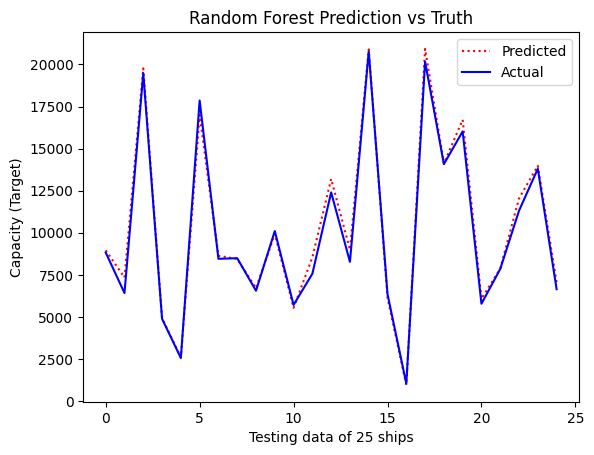

In [137]:
# plot the predicted test results as a red line
plt.plot(random_forest_pred, "r:", label="Predicted")

# plot the actual test results as a blue line
plt.plot( y_test, "b-", label="Actual")

# add a legend and axis labels
plt.legend()
plt.title("Random Forest Prediction vs Truth")
plt.xlabel("Testing data of 25 ships")
plt.ylabel("Capacity (Target)")
plt.show()

Neural Network - Using MLPRegressor

In [138]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error, mean_squared_error
regressor = MLPRegressor(hidden_layer_sizes=(100,), solver="adam", max_iter=40000, random_state=0)
regressor.fit(X_train, y_train)
# print('VALIDATION SCORE ' ,regressor.validation_scores_)

# print(y_test)
mlp_pred = regressor.predict(X_test)
# print(outputs)
print(mean_absolute_percentage_error(y_test,mlp_pred))
print(mean_absolute_error(y_test,mlp_pred))
print("Actual Value ", y_test[9])
print("Predicted Value ", mlp_pred[9])
# print(np.mean(abs(outputs-y_test)))
# mse = mean_squared_error(y_test, outputs)
# print(mse)

# plt.plot(mlp_pred, "r:", label="Predicted")

# plot the actual test results as a blue line
# plt.plot( y_test, "b-", label="Actual")

# add a legend and axis labels
# plt.legend()
# plt.title("MLP vs Truth")
# plt.xlabel("Testing data of 25 ships")
# plt.ylabel("Capacity (Target)")
# plt.show()

# Calculate the mean squared error (MSE) and mean absolute error (MAE) of the model
mse = mean_squared_error(y_test, mlp_pred)
mae = mean_absolute_error(y_test, mlp_pred)

# Print the MSE and MAE of the model
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)

0.049712259553450024
466.02235645945564
Actual Value  10100
Predicted Value  10773.157150267858
Mean Squared Error:  328171.975052024
Mean Absolute Error:  466.02235645945564


C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40000) reached and the optimization hasn't converged yet.
  warnings.warn(


Support Vector Machine - Although widly used for classification problems to find the hyperplane,  we are going to use  Support vector REgression (SVR) algorithim.


In [141]:
from sklearn.svm import SVR
svm = SVR(kernel='rbf', C=1.0, epsilon=0.1)
# regressor = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("Actual Value ", y_test[24])
print("Predicted Value ", svm_pred[24])
mse = mean_squared_error(y_test, svm_pred)
print("MSE: {:.2f}".format(mse))
# plt.figure()
# plt.scatter()
# plt.plot(svm_pred, "r:", label="Predicted")

# # plot the actual test results as a blue line
# plt.plot( y_test, "b-", label="Actual")

# # add a legend and axis labels
# plt.legend()
# plt.title("SVM vs Truth")
# plt.xlabel("Testing data of 25 ships")
# plt.ylabel("Capacity (Target)")
# plt.show()



Actual Value  6648
Predicted Value  8797.056527777591
MSE: 29915406.08


Produce a list of top ten predicted containers by capacity for each of the 3 implementations.

In [155]:
df = data
df
svm_pred_unscaled = scaler.inverse_transform(svm_pred.reshape(-1, 1)) 
svm_pred_unscaled
cols = np.array(["Year_Built","Gross_Tonnage","Deadweight_Tonnage","Length","Beam","Forward_Bays","Center_Bays","Aft_Bays"])
x_test_unscaled = pd.DataFrame(X_test, columns=cols)
df_pred_unscaled['target'] = y_test
df_pred_unscaled['predicted'] = y_pred_unscaled.ravel()
# print(len(svm_pred_unscaled))
# cols = np.array(["Year_Built","Gross_Tonnage","Deadweight_Tonnage","Length","Beam","Forward_Bays","Center_Bays","Aft_Bays"])
# df = pd.DataFrame(inputs,columns=cols)
# df
# df['target'] = y_test
# df['predicted'] = y_pred

array([[ 9796.70922061],
       [15873.07080318],
       [ -608.27276597],
       [ 5727.78527959],
       [13157.35413269],
       [13889.97452921],
       [ 8616.94702681],
       [15452.30704936],
       [ 8702.64217342],
       [17569.86452118],
       [ 4485.03932622],
       [13351.45401923],
       [12343.32457784],
       [  -71.81874709],
       [ 4111.59203512],
       [ 6237.54048346],
       [ 9996.42515767],
       [ 2148.09213904],
       [ 8391.28113354],
       [ 8430.19685934],
       [ 5571.3041757 ],
       [ 4637.44784832],
       [ 8643.34012364],
       [12616.84227116],
       [ 5009.70870341]])

check the ERROS

In [95]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate the MSE, RMSE, and MAE scores
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

# Print the scores
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R2 score: ", r2)


MSE:  28971167.347391065
RMSE:  5382.487096816031
MAE:  4349.269412754497
R2 score:  -0.008505817165157303


Produce a decision tree

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
fig,axes = plt.subplots(nrows= 1, ncols=1, figsize=(4,4), dpi=600)
tree.plot_tree(rfc.estimators_)


Show Feature importance

In [130]:
importance = pd.DataFrame({'feature':X_train,'importance':np.round(rfc.feature_importances_,3)})


ValueError: Per-column arrays must each be 1-dimensional

Randomize the data (even though it looks like the are in no particuilar order). This is to be sure the train-test split has a even number of data from all capacities

In [ ]:
I = np.random.permutation(inputs)
I

Show a decision tree to better understand the model.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree




Cross-Validation

In [ ]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(regressor, scaled, targets, cv=5, return_train_score=True)
training = cv_results["train_score"]
testing = cv_results["test_score"]
plt.boxplot([training, testing], labels=['Training', 'Testing'])

Train/Test/Spit many times

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [89]:
 # X = scaledInputs
    # y = targets
for i in range(10):
    # I = np.random.permutation(len(data))
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
    # print('running')

TRAIN ALL MODELS (YOUTUBE VIDEO)

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [14]:
from sklearn.pipeline import make_pipeline
# Store all the pipeline inside a dictionary.
pipelines = {
    'rf': make_pipeline(RandomForestRegressor(n_estimators=100, random_state=0)),
    'mlp' : make_pipeline(MLPRegressor(random_state=0)),
    'svr' : make_pipeline(SVR())
}
# Setup a hyperparameter grid so we can easily tune to get a better prediction




In [18]:
hyper_param_grid = {
    'rf': {
        'randomforestregressor__n_estimators':[50,100,200]
    },
    'mlp' : {
        'mlpregressor__hidden_layer_sizes':[50,100,200],
        'mlpregressor__solver':['adam'],
         'mlpregressor__max_iter':[1000,5000,10000]
    },
    'svr': {
        'svr__kernel':['rbf','sigmoid'],

    }
    
        
}


In [19]:
# import grid search cv
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError
fit_model = {}
for algo,pipeline in pipelines.items():
    try:
        model = GridSearchCV(pipeline,hyper_param_grid[algo], cv=10, n_jobs=1)
        print('Training started for',algo)
        model.fit(X_train,y_train)
        fit_model[algo] = model
        print (algo, 'has been fit')
    except NotFittedError as e:
        print(repr(e))


Training started for rf
rf has been fit
Training started for mlp


C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rish

mlp has been fit
Training started for svr
svr has been fit


C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
fit_model['svr'].predict(X_test)

array([8495.52964518, 8496.08094783, 8527.96305323, 8525.60956143,
       8500.43851315, 8527.66143195, 8529.14257855, 8494.69116096,
       8499.10468421, 8493.9827027 , 8493.31096727, 8529.81510147,
       8529.9199038 , 8499.18375856, 8527.02742011, 8488.10876008,
       8503.3329183 , 8517.02080197, 8491.69049071, 8492.52989651,
       8529.06855218, 8500.17901099, 8490.85654899, 8500.83219106,
       8499.06316795])

Use R2 SCORE AND MAE
high r2 is better
low mae is better

In [29]:
from sklearn.metrics import r2_score, mean_absolute_error


In [ ]:
for algo,model in fit_model.items():
    yhat = model.predict(X_test)
    print('')
    